In [84]:
import pandas as pd
import numpy as np

# Loading Data

In [85]:
df = pd.read_csv('Crop_recommendation_dataset.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [86]:
df.size

17600

In [87]:
df.shape

(2200, 8)

In [88]:
#printing headers
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [89]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [90]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [91]:
labels = df['label'].unique()
print(labels)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [92]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [93]:
# Count the occurrences of values in a given column of a DataFrame.
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

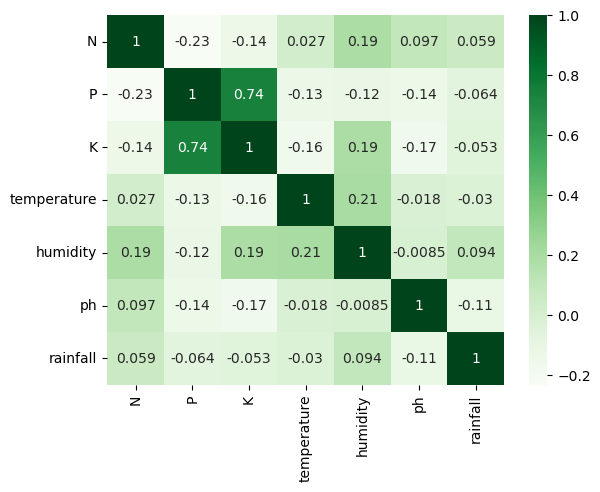

In [95]:
sns.heatmap(df.corr(),annot=True,cmap = 'Greens')
plt.show()

In [96]:
from sklearn.metrics import classification_report
from sklearn import metrics

# Data Preparation

In [97]:
#Separating features and target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [98]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [99]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =42)

In [100]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

## Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [102]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
print(score)

[0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


### Saving the model

In [103]:
import pickle

DT_pkl_filename = r'SavedModels/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

## Gaussian Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [105]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
print(score)

[0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


### Saving the model

In [106]:
NB_pkl_filename = r'SavedModels/NBClassifier.pkl'
# Open the file to save as pkl file

NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

# Close the pickle instances
NB_Model_pkl.close()

## Support Vector Machine

In [107]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.09090909090909091
              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19        19
   muskmelon       1.00      0.59      0.74        17
      orange       0.00      0.00      0.

In [108]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
print(score)

[0.27727273 0.28863636 0.29090909 0.275      0.26818182]


### Saving the model

In [109]:
SVM_pkl_filename = r'SavedModels/SVMClassifier.pkl'
# Open the file to save as pkl file

SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)

# Close the pickle instances
SVM_Model_pkl.close()

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00   

In [111]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
print(score)

[0.95       0.96590909 0.94772727 0.96590909 0.94318182]


### Saving the model

In [112]:
LR_pkl_filename = r'SavedModels/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

In [114]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
print(score)

[0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


### Saving the model

In [115]:
RF_pkl_filename = r'SavedModels/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Accuracy Comparison

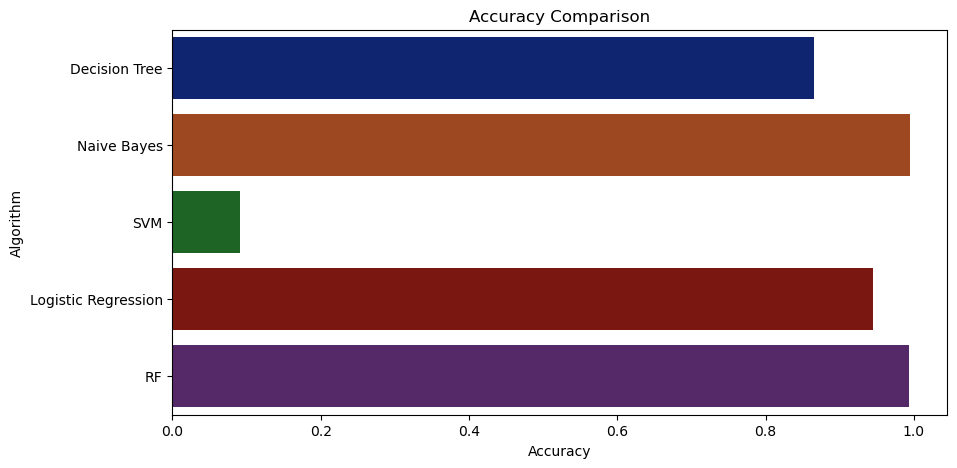

In [116]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

plt.show()

In [117]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.865909090909091
Naive Bayes --> 0.9954545454545455
SVM --> 0.09090909090909091
Logistic Regression --> 0.9454545454545454
RF --> 0.9931818181818182


# Testing the Models

In [118]:
#Making a prediction
data = np.array([[18,30,29,26.762749300000007,92.86056895,6.4200187170000005,224.5903664]])
prediction = RF.predict(data)
print(prediction)

['coconut']


In [119]:
#Making a prediction
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = LogReg.predict(data)
print(prediction)

['coffee']


In [120]:
#Making a prediction
data = np.array([[71,54,16,22.61359953,63.69070564,5.7499144210000015,87.75953857]])
prediction = SVM.predict(data)
print(prediction)

['lentil']


In [121]:
#Making a prediction
data = np.array([[98,47,37,23.48381344,81.33265073,7.375482851,224.0581164]])
prediction = NaiveBayes.predict(data)
print(prediction)

['rice']


In [122]:
#Making a prediction
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = DecisionTree.predict(data)
print(prediction)

['coffee']


In [123]:
#Making a prediction
data = np.array([[27,60,17,26.41768321,63.64698302,7.0267953589999985,64.42177127]])
prediction = DecisionTree.predict(data)
print(prediction)

['blackgram']
